# Object Detection Model

Data set: https://www.kaggle.com/datasets/jaiahuja/skin-cancer-detection



## Importing libraries

In [1]:
import os
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import random
from tensorflow import keras

## Accesing data set



In [2]:
# installing Kaggle API
!pip install kaggle

In [3]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# setting environment variable 'KAGGLE_CONFIG_DIR' to connect to Kaggle via API
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [6]:
# navigating to the directory where data will be stored
os.chdir('/content/drive/MyDrive/data')

In [ ]:
# downloading data set to '/content/drive/MyDrive/data'
!kaggle datasets download -d jaiahuja/skin-cancer-detection --force

100% 782M/786M [00:39<00:00, 33.0MB/s]
100% 786M/786M [00:39<00:00, 20.9MB/s]


In [ ]:
# unzipping zip file.
!unzip skin-cancer-detection.zip

## Getting X_train, y_train, X_test, y_test

* Getting pictures from the folders.
* Transforming pictures into numpy arrays.
* Defining X_train, y_train, X_test, y_test.



### Defining folder paths

In [7]:
# defining the path to train and test folders
folder_train = '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
folder_test = '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [8]:
# getting lists of the subfolders within train and test
subfolders_train = [os.path.join(folder_train, name) for name in os.listdir(folder_train) if os.path.isdir(os.path.join(folder_train, name))]
subfolders_test = [os.path.join(folder_test, name) for name in os.listdir(folder_test) if os.path.isdir(os.path.join(folder_test, name))]

In [9]:
print(subfolders_train)
print(subfolders_test)

['/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis', '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma', '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma', '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma', '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus', '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis', '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis', '/content/drive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma', '/content/drive/MyDrive/data/Skin cancer ISIC The International Sk

### X_train, y_train

In [10]:
# Create an empty lists to store the image arrays and their corresponding labels
X_train = []
y_train = []

In [16]:
# Loop over the folders
for folder, label in zip(subfolders_train, [0,1,2,3,4,5,6,7,8]):
    # Loop over the files in the folder
    for filename in os.listdir(folder):
        # Load the image
        img = Image.open(os.path.join(folder, filename))
        # Resize the image
        img = img.resize((224, 224)).convert('RGB')
        # Convert the image to a numpy array
        img_array = np.array(img, dtype='uint8')
        # Append the image and its corresponding label to the lists
        X_train.append(img_array)
        y_train.append(label)

In [17]:
# Convert the lists to numpy arrays
X_train = np.stack(X_train)
y_train = np.array(y_train)

In [18]:
# looking at type and shape to see that everything is correct. We should get 2339 images of size 224x224, and 3 numbers for the RGB configuration
print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2239, 224, 224, 3)
(2239,)


In [19]:
X_train

array([[[[114,  86,  88],
         [113,  85,  85],
         [109,  82,  78],
         ...,
         [145, 120, 124],
         [137, 109, 110],
         [108,  90,  98]],

        [[115,  86,  87],
         [113,  84,  84],
         [109,  82,  79],
         ...,
         [150, 124, 128],
         [140, 110, 110],
         [126, 100, 102]],

        [[115,  84,  84],
         [112,  83,  82],
         [108,  81,  78],
         ...,
         [151, 123, 128],
         [142, 110, 115],
         [137, 102, 103]],

        ...,

        [[137, 114, 111],
         [138, 115, 114],
         [137, 116, 117],
         ...,
         [163, 149, 149],
         [163, 149, 149],
         [162, 148, 148]],

        [[138, 114, 115],
         [139, 116, 118],
         [139, 117, 119],
         ...,
         [162, 148, 148],
         [162, 148, 148],
         [161, 147, 147]],

        [[138, 113, 116],
         [139, 115, 118],
         [139, 117, 119],
         ...,
         [159, 146, 146],
        

In [20]:
(y_train)

array([0, 0, 0, ..., 8, 8, 8])

### X_test, y_test

In [21]:
# Create an empty lists to store the image arrays and their corresponding labels
X_test = []
y_test = []

In [22]:
# Loop over the folders
for folder, label in zip(subfolders_test, [0,1,2,3,4,5,6,7,8]):
    # Loop over the files in the folder
    for filename in os.listdir(folder):
        # Load the image
        img = Image.open(os.path.join(folder, filename))
        # Resize the image
        img = img.resize((224, 224)).convert('RGB')
        # Convert the image to a numpy array
        img_array = np.array(img, dtype='uint8')
        # Append the image and its corresponding label to the lists
        X_test.append(img_array)
        y_test.append(label)

In [23]:
# Convert the lists to numpy arrays
X_test = np.stack(X_test)
y_test = np.array(y_test)

In [24]:
# looking at type and shape to see that everything is correct. We should get 118 images of size 224x224, and 3 numbers for the RGB configuration
print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(118, 224, 224, 3)
(118,)


In [25]:
X_test

array([[[[237, 141, 161],
         [239, 140, 158],
         [238, 140, 159],
         ...,
         [239, 158, 166],
         [241, 160, 172],
         [244, 171, 184]],

        [[239, 146, 165],
         [238, 141, 160],
         [237, 144, 162],
         ...,
         [236, 152, 159],
         [242, 164, 174],
         [245, 175, 187]],

        [[237, 149, 166],
         [237, 146, 163],
         [238, 147, 164],
         ...,
         [238, 156, 164],
         [243, 172, 182],
         [240, 177, 185]],

        ...,

        [[232, 135, 145],
         [227, 132, 141],
         [230, 136, 144],
         ...,
         [236, 128, 116],
         [239, 127, 111],
         [238, 137, 128]],

        [[232, 138, 146],
         [233, 142, 153],
         [236, 144, 157],
         ...,
         [237, 139, 126],
         [237, 132, 118],
         [237, 142, 136]],

        [[234, 137, 146],
         [234, 140, 152],
         [234, 142, 159],
         ...,
         [238, 146, 142],
        

In [26]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8])

### Displaying images
Doing this as a control check to confirm our work has been good thus far. The images displayed and the 'num' should match the images' order in the folders.

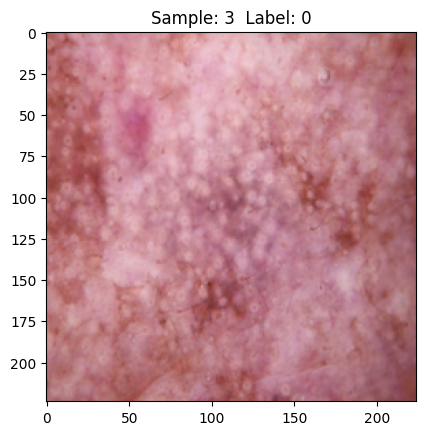

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_sample(num):
    image = X_train[num] # Get the image
    label = y_train[num] # Get the label
    plt.title('Sample: %d  Label: %d' % (num, label)) # displaying in the title the sample_num as well as the label
    plt.imshow(image, cmap=plt.get_cmap())
    plt.show()

display_sample(3)

## Transforming our data

### Shuffling the images and labels in the same order


In [32]:
# getting length of the numpy array
n = len(X_train)

# create a random permutation of the indices
indices = np.random.permutation(n)

# use the permutation to shuffle X and y
X_train = X_train[indices]
y_train = y_train[indices]

In [33]:
y_train[1:11]

array([0, 4, 4, 2, 7, 4, 4, 0, 5, 8])

In [35]:
# getting length of the numpy array
n = len(X_test)

# create a random permutation of the indices
indices = np.random.permutation(n)

# use the permutation to shuffle X and y
X_test = X_test[indices]
y_test = y_test[indices]

In [36]:
y_test

array([2, 2, 2, 4, 7, 1, 0, 1, 8, 2, 0, 6, 1, 3, 0, 5, 5, 3, 5, 7, 2, 7,
       3, 4, 1, 4, 5, 3, 5, 0, 1, 0, 4, 5, 7, 0, 1, 3, 2, 2, 3, 7, 4, 3,
       2, 5, 7, 0, 0, 4, 4, 0, 5, 4, 7, 4, 1, 3, 8, 3, 0, 7, 5, 4, 1, 4,
       1, 3, 4, 0, 0, 2, 1, 4, 8, 2, 7, 5, 2, 2, 7, 2, 6, 7, 7, 2, 2, 3,
       0, 5, 5, 3, 3, 4, 4, 1, 5, 2, 7, 1, 7, 5, 0, 5, 3, 0, 5, 0, 6, 1,
       1, 3, 4, 7, 1, 1, 3, 7])

### Converting data into the format the Keras/TensorFlow expects
* standardized data for X
* one-hot vectors for y

In [37]:
X_train = X_train.astype('float32') # to change the ints to floats.
X_train /= 255 # to standardize the values between 0 and 255 into 0 to 1.
X_train[0]

array([[[0.827451  , 0.5058824 , 0.5568628 ],
        [0.83137256, 0.49411765, 0.5529412 ],
        [0.83137256, 0.56078434, 0.5803922 ],
        ...,
        [0.8235294 , 0.6039216 , 0.5882353 ],
        [0.83137256, 0.6117647 , 0.6039216 ],
        [0.8392157 , 0.6117647 , 0.60784316]],

       [[0.827451  , 0.57254905, 0.59607846],
        [0.827451  , 0.54509807, 0.5803922 ],
        [0.827451  , 0.5647059 , 0.5921569 ],
        ...,
        [0.827451  , 0.6039216 , 0.6       ],
        [0.8352941 , 0.6117647 , 0.60784316],
        [0.8392157 , 0.6117647 , 0.60784316]],

       [[0.8352941 , 0.6039216 , 0.61960787],
        [0.827451  , 0.59607846, 0.61960787],
        [0.83137256, 0.5921569 , 0.6156863 ],
        ...,
        [0.8352941 , 0.6039216 , 0.6117647 ],
        [0.8352941 , 0.60784316, 0.6117647 ],
        [0.8352941 , 0.6117647 , 0.6117647 ]],

       ...,

       [[0.8392157 , 0.64705884, 0.65882355],
        [0.8352941 , 0.6431373 , 0.6509804 ],
        [0.83137256, 0

In [38]:
X_test = X_test.astype('float32') # to change the ints to floats.
X_test /= 255 # to standardize the values between 0 and 255 into 0 to 1.
X_test[0]

array([[[0.81960785, 0.59607846, 0.6431373 ],
        [0.83137256, 0.6117647 , 0.654902  ],
        [0.84313726, 0.62352943, 0.67058825],
        ...,
        [0.29803923, 0.16078432, 0.22745098],
        [0.2627451 , 0.12941177, 0.19607843],
        [0.23529412, 0.10588235, 0.16470589]],

       [[0.81960785, 0.5882353 , 0.61960787],
        [0.84313726, 0.6156863 , 0.6666667 ],
        [0.84313726, 0.627451  , 0.6901961 ],
        ...,
        [0.3019608 , 0.16078432, 0.23137255],
        [0.2784314 , 0.14117648, 0.20784314],
        [0.2509804 , 0.10980392, 0.1764706 ]],

       [[0.7921569 , 0.54901963, 0.5686275 ],
        [0.83137256, 0.5921569 , 0.6313726 ],
        [0.8392157 , 0.6117647 , 0.65882355],
        ...,
        [0.31764707, 0.16470589, 0.23921569],
        [0.3019608 , 0.15294118, 0.22745098],
        [0.26666668, 0.1254902 , 0.19215687]],

       ...,

       [[0.81960785, 0.6117647 , 0.7058824 ],
        [0.8235294 , 0.6       , 0.6862745 ],
        [0.8235294 , 0

In [39]:
y_train = keras.utils.to_categorical(y_train, 9)

In [40]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
y_test = keras.utils.to_categorical(y_test, 9)

In [42]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Displaying some of the transformed images


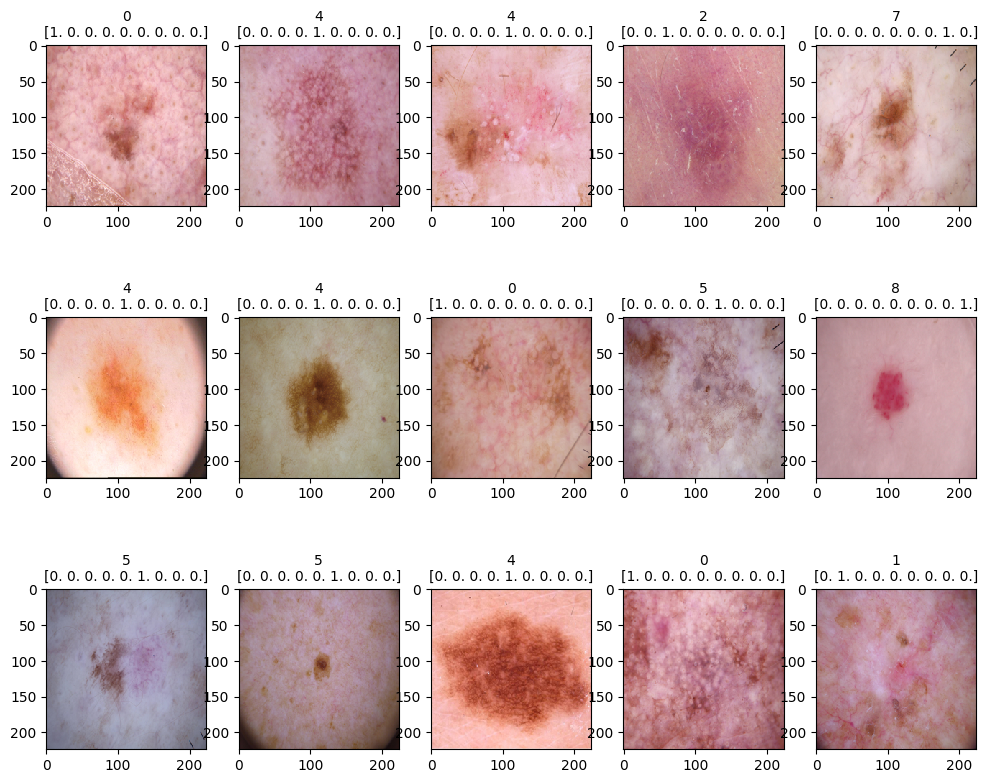

In [43]:
w=40
h=30
fig=plt.figure(figsize=(12, 10))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    label_int = y_train[i].argmax(axis=0)
    label_cat = y_train[i]
    ax.title.set_text(f'{label_int}\n{label_cat}')
    ax.title.set_fontsize(10)  # Set font size to 10
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

## Creating Neural Network

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten # for model with CNN.
import tensorflow as tf

In [45]:
model = Sequential()

# Adding first convolution layer.
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224, 3))) # 16 filters, kernel size of 3x3, 'same' padding, and ReLU activation. Input shape is the same size as the images.
# Adding a Max Pooling layer to reduce the dimensionality of the previous layer by taking the max value of each 2x2 block.
model.add(MaxPooling2D())

# Adding second convolution layer.
model.add(Conv2D(32, 3, padding='same', activation='relu')) # 32 filters, kernel size of 3x3, 'same' padding, and ReLU activation.
# Adding a Max Pooling layer to reduce the dimensionality of the previous layer by taking the max value of each 2x2 block.
model.add(MaxPooling2D())

# Adding third convolution layer.
model.add(Conv2D(64, 3, padding='same', activation='relu')) # 64 filters, kernel size of 3x3, 'same' padding, and ReLU activation.
# Adding a Max Pooling layer to reduce the dimensionality of the previous layer by taking the max value of each 2x2 block.
model.add(MaxPooling2D())

# Dropout to avoid overfitting.
model.add(Dropout(0.2))

# Flatten the results to one dimension for passing into our first  fully connected layer.
model.add(Flatten())

# Adding a fully connected layer to the model. The layer has 128 neurons, and the activation function used is ReLU.
model.add(Dense(128, activation='relu'))

# Final categorization from 0-1 with softmax.
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

## Model fitting and validation


### Training the model

In [47]:
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/10
45/45 - 19s - loss: 2.1359 - accuracy: 0.2434 - val_loss: 2.2926 - val_accuracy: 0.1610 - 19s/epoch - 412ms/step
Epoch 2/10
45/45 - 3s - loss: 1.7499 - accuracy: 0.3716 - val_loss: 2.1095 - val_accuracy: 0.2542 - 3s/epoch - 65ms/step
Epoch 3/10
45/45 - 3s - loss: 1.4680 - accuracy: 0.4940 - val_loss: 2.3290 - val_accuracy: 0.2966 - 3s/epoch - 65ms/step
Epoch 4/10
45/45 - 3s - loss: 1.3126 - accuracy: 0.5346 - val_loss: 2.2017 - val_accuracy: 0.3475 - 3s/epoch - 68ms/step
Epoch 5/10
45/45 - 3s - loss: 1.2660 - accuracy: 0.5502 - val_loss: 2.3153 - val_accuracy: 0.3390 - 3s/epoch - 66ms/step
Epoch 6/10
45/45 - 3s - loss: 1.2213 - accuracy: 0.5650 - val_loss: 2.1706 - val_accuracy: 0.3136 - 3s/epoch - 64ms/step
Epoch 7/10
45/45 - 3s - loss: 1.0879 - accuracy: 0.6123 - val_loss: 2.2531 - val_accuracy: 0.3559 - 3s/epoch - 64ms/step
Epoch 8/10
45/45 - 3s - loss: 0.9992 - accuracy: 0.6458 - val_loss: 2.5754 - val_accuracy: 0.3644 - 3s/epoch - 67ms/step
Epoch 9/10
45/45 - 3s - loss:

### Testing model's results

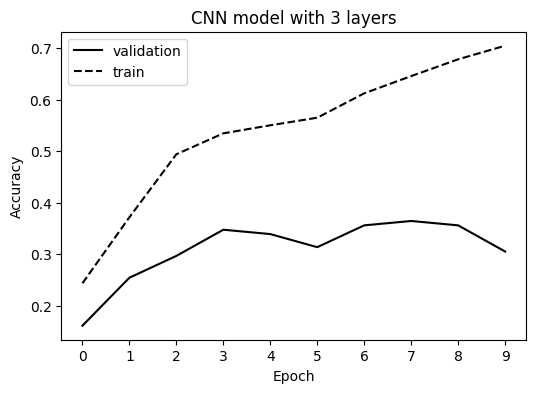

In [48]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title(f'CNN model with 3 layers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()

plt.show()

In [49]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.492663860321045
Test accuracy: 0.3050847351551056


## Conclusion

With a test accuracy of 35.6%, our model is not very good to predict the type of mole it is assessing. Here are some suggestions that could potentially be implemented to improve the model:

1. Modify the model: add new layers or edit the existing ones.
2. Alter the training data: rotating, zooming in/out, flipping, changing color tones of the images would increase the training data, and potentially result in higher accuracy.
3. Tune the hyperparameters: experiment with different learning rates, batch sizes, and optimizers.
4. Look into missclasified cases: Closely analyze those images that got incorrectly classified to identify a pattern. Maybe certain classes are struggling while the others are not.